In [165]:
#import neccessary libraries and kits 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from ipywidgets import interact
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [133]:
#read files using pandas dataframe library
Data= pd.read_csv('EthiotelecomCDRData.csv', encoding='utf-8-sig',engine='python')
Data.head()

,CDR_ID,RE_ID,BILLING_NBR,CDR_TYPE,CALLING_NUMBER,CALLED_NUMBER,CALLING_IMEI,CALLING_IMSI,THE_THIRD_PARTY_NUMBER,CALL_START_TIME,...,DOWNLOAD_TRAFFIC,BILLING_OFFERING_ID,ERROR_CDT_TYPE,CALLFORWARDINDICATOR,HOTLINEINDICATOR,CALLING_TRUNK_ID,CALLED_TRUNK_ID,TOTAL_DOWNLOAD_TRAFFIC,TOTAL_CALL_DURATION,TOTAL_CALL_FEE
0,21881508342,5,995865935,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,...,1484,0,N,\N,\N,\N,\N,1484,18,0
1,21881508721,5,972133472,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,...,3154135,761873383,N,\N,\N,\N,\N,3155619,974,7004
2,21881508722,5,972320618,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,...,530,0,N,\N,\N,\N,\N,3156149,978,7102
3,21881508725,5,983483768,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,...,882,0,N,\N,\N,\N,\N,3157031,997,7200
4,21881508726,5,912262792,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,...,8740,0,N,\N,\N,\N,\N,3165771,2682,7298


In [134]:
Data.columns
#just to clean out \nnnnn \aaa and other unknown values
Data.columns.str.replace('\n','', regex=True)


Index(['CDR_ID', 'RE_ID', 'BILLING_NBR', 'CDR_TYPE', 'CALLING_NUMBER',
       'CALLED_NUMBER', 'CALLING_IMEI', 'CALLING_IMSI',
       'THE_THIRD_PARTY_NUMBER', 'CALL_START_TIME', 'CALL_END_TIME',
       'CALL_DURATION', 'CALL_FEE', 'CALLED_COUNTRY', 'CALLING_CARRIER',
       'CALLED_CARRIER', 'CALLING_DISTRICT', 'CALLED_DISTRICT', 'STATUS_DATE',
       'CALLING_SUB_ID', 'BILLING_CYCLE_ID', 'CHARGE_1CHARGE_2', 'Unnamed: 22',
       'RATE_ID1', 'ACCOUNT_ITEM_ID1', 'UPLOAD_TRAFFIC', 'DOWNLOAD_TRAFFIC',
       'BILLING_OFFERING_ID', 'ERROR_CDT_TYPE', 'CALLFORWARDINDICATOR',
       'HOTLINEINDICATOR', 'CALLING_TRUNK_ID', 'CALLED_TRUNK_ID',
       'TOTAL_DOWNLOAD_TRAFFIC', 'TOTAL_CALL_DURATION', 'TOTAL_CALL_FEE'],
      dtype='object')

In [62]:
Data.head()

,CDR_ID,RE_ID,BILLING_NBR,CDR_TYPE,CALLING_NUMBER,CALLED_NUMBER,CALLING_IMEI,CALLING_IMSI,THE_THIRD_PARTY_NUMBER,CALL_START_TIME,...,DOWNLOAD_TRAFFIC,BILLING_OFFERING_ID,ERROR_CDT_TYPE,CALLFORWARDINDICATOR,HOTLINEINDICATOR,CALLING_TRUNK_ID,CALLED_TRUNK_ID,TOTAL_DOWNLOAD_TRAFFIC,TOTAL_CALL_DURATION,TOTAL_CALL_FEE
0,21881508342,5,995865935,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,...,1484,0,N,\N,\N,\N,\N,1484,18,0
1,21881508721,5,972133472,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,...,3154135,761873383,N,\N,\N,\N,\N,3155619,974,7004
2,21881508722,5,972320618,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,...,530,0,N,\N,\N,\N,\N,3156149,978,7102
3,21881508725,5,983483768,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,...,882,0,N,\N,\N,\N,\N,3157031,997,7200
4,21881508726,5,912262792,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,...,8740,0,N,\N,\N,\N,\N,3165771,2682,7298


In [ ]:
#'CDR_ID','RE_ID','BILLING_NBR','CDR_TYPE','CALLING_NUMBER','CALLED_NUMBER','CALLING_IMEI',	'CALLING_IMSI',	'THE_THIRD_PARTY_NUMBER','CALL_START_TIME',	'CALL_END_TIME','CALL_DURATION',	'CALL_FEE',	'CALLED_COUNTRY',	'CALLING_CARRIER','CALLED_CARRIER',	'CALLING_DISTRICT',	'CALLED_DISTRICT', 'STATUS_DATE',	'CALLING_SUB_ID',	'BILLING_CYCLE_ID',	'CHARGE_1CHARGE_2',	'RATE_ID1',	'ACCOUNT_ITEM_ID1',	'UPLOAD_TRAFFIC',	'DOWNLOAD_TRAFFIC',	'BILLING_OFFERING_ID','ERROR_CDT_TYPE',	'CALLFORWARDINDICATOR',	'HOTLINEINDICATOR',	'CALLING_TRUNK_ID',	'CALLED_TRUNK_ID'

In [ ]:
from pandas import DataFrame

In [136]:
df = DataFrame(Data,columns=['CDR_ID','RE_ID','BILLING_NBR','CDR_TYPE','CALLING_NUMBER','CALLED_NUMBER','CALLING_IMEI',	'CALLING_IMSI',	'THE_THIRD_PARTY_NUMBER','CALL_START_TIME',	'CALL_END_TIME','CALL_DURATION',	'CALL_FEE',	'CALLED_COUNTRY',	'CALLING_CARRIER','CALLED_CARRIER',	'CALLING_DISTRICT',	'CALLED_DISTRICT', 'STATUS_DATE',	'CALLING_SUB_ID',	'BILLING_CYCLE_ID',	'CHARGE_1CHARGE_2',	'RATE_ID1',	'ACCOUNT_ITEM_ID1',	'UPLOAD_TRAFFIC',	'DOWNLOAD_TRAFFIC',	'BILLING_OFFERING_ID','ERROR_CDT_TYPE',	'CALLFORWARDINDICATOR',	'HOTLINEINDICATOR',	'CALLING_TRUNK_ID',	'CALLED_TRUNK_ID','TOTAL_DOWNLOAD_TRAFFIC','TOTAL_CALL_DURATION','TOTAL_CALL_FEE'])
df['CDR_TYPE'] = df['CDR_TYPE'].replace(['\\N'],0)  
df['CALLED_NUMBER'] = df['CALLED_NUMBER'].replace(['\\N'],0)  
df['CALLING_IMEI'] = df['CALLING_IMEI'].replace(['\\N'],0)  
df[	'CALLING_IMSI'] = df['CALLING_IMSI'].replace(['\\N'],0)  
df[	'THE_THIRD_PARTY_NUMBER'] = df['THE_THIRD_PARTY_NUMBER'].replace(['\\N'],0)  

df['CALLED_COUNTRY'] = df['CALLED_COUNTRY'].replace(['\\N'],0)  
df['CALLED_CARRIER'] = df['CALLED_CARRIER'].replace(['\\N'],0)  
df['CALLING_DISTRICT'] = df['CALLING_DISTRICT'].replace(['\\N'],0)  
df[	'CALLED_DISTRICT'] = df['CALLED_DISTRICT'].replace(['\\N'],0)  
df[	'CALLING_SUB_ID'] = df['CALLING_SUB_ID'].replace(['\\N'],0)  

df['RATE_ID1'] = df['RATE_ID1'].replace(['\\N'],0)  
del df['ERROR_CDT_TYPE']
df['CALLFORWARDINDICATOR'] = df['CALLFORWARDINDICATOR'].replace(['\\N'],0)  
df[	'HOTLINEINDICATOR'] = df['HOTLINEINDICATOR'].replace(['\\N'],0)  
df[	'CALLING_TRUNK_ID'] = df['CALLING_TRUNK_ID'].replace(['\\N'],0)  
df[	'CALLED_TRUNK_ID'] = df['CALLED_TRUNK_ID'].replace(['\\N'],0) 

df['CALL_START_TIME']=df['CALL_START_TIME'].replace(['0001-08-11 BC'],'01-08-11')
df['CALL_END_TIME']=df['CALL_END_TIME'].replace(['0001-08-11 BC'],'01-08-11')
df['CALL_START_TIME']=df['CALL_START_TIME'].replace(['0001-08-10 BC'],'01-08-10')
df['CALL_END_TIME']=df['CALL_END_TIME'].replace(['0001-08-10 BC'],'01-08-10')
df['STATUS_DATE']=df['STATUS_DATE'].replace(['0001-08-11 BC'],'01-08-11')
df['STATUS_DATE']=df['STATUS_DATE'].replace(['0001-08-10 BC'],'01-08-10')
df.head()

,CDR_ID,RE_ID,BILLING_NBR,CDR_TYPE,CALLING_NUMBER,CALLED_NUMBER,CALLING_IMEI,CALLING_IMSI,THE_THIRD_PARTY_NUMBER,CALL_START_TIME,...,UPLOAD_TRAFFIC,DOWNLOAD_TRAFFIC,BILLING_OFFERING_ID,CALLFORWARDINDICATOR,HOTLINEINDICATOR,CALLING_TRUNK_ID,CALLED_TRUNK_ID,TOTAL_DOWNLOAD_TRAFFIC,TOTAL_CALL_DURATION,TOTAL_CALL_FEE
0,21881508342,5,995865935,0,2.520000e+11,0,0,0,0,01-08-11,...,549,1484,0,0,0,0,0,1484,18,0
1,21881508721,5,972133472,0,2.520000e+11,0,0,0,0,01-08-11,...,418577,3154135,761873383,0,0,0,0,3155619,974,7004
2,21881508722,5,972320618,0,2.520000e+11,0,0,0,0,01-08-11,...,726,530,0,0,0,0,0,3156149,978,7102
3,21881508725,5,983483768,0,2.520000e+11,0,0,0,0,01-08-11,...,396,882,0,0,0,0,0,3157031,997,7200
4,21881508726,5,912262792,0,2.520000e+11,0,0,0,0,01-08-11,...,17461,8740,0,0,0,0,0,3165771,2682,7298


In [26]:
#pd.to_datetime(df['CALL_START_TIME']).dt.total_seconds().astype(int)
df['CALL_START_TIME'] = pd.to_datetime(df['CALL_START_TIME'], infer_datetime_format=True)
df['CALL_END_TIME'] = pd.to_datetime(df['CALL_END_TIME'], infer_datetime_format=True)
df['STATUS_DATE'] = pd.to_datetime(df['STATUS_DATE'], infer_datetime_format=True)
df['STATUS_DATE'] =df['STATUS_DATE'].apply(pd.Timestamp)
df['STATUS_DATE']

0      2011-01-08
1      2011-01-08
2      2011-01-08
3      2011-01-08
4      2011-01-08
5      2011-01-08
6      2011-01-08
7      2011-01-08
8      2011-01-08
9      2011-01-08
10     2011-01-08
11     2011-01-08
12     2011-01-08
13     2011-01-08
14     2011-01-08
15     2011-01-08
16     2011-01-08
17     2011-01-08
18     2011-01-08
19     2011-01-08
20     2011-01-08
21     2011-01-08
22     2011-01-08
23     2011-01-08
24     2011-01-08
25     2011-01-08
26     2011-01-08
27     2011-01-08
28     2011-01-08
29     2011-01-08
          ...    
4804   2011-01-08
4805   2011-01-08
4806   2011-01-08
4807   2011-01-08
4808   2011-01-08
4809   2011-01-08
4810   2011-01-08
4811   2011-01-08
4812   2011-01-08
4813   2011-01-08
4814   2011-01-08
4815   2011-01-08
4816   2011-01-08
4817   2011-01-08
4818   2011-01-08
4819   2011-01-08
4820   2011-01-08
4821   2011-01-08
4822   2011-01-08
4823   2011-01-08
4824   2011-01-08
4825   2011-01-08
4826   2011-01-08
4827   2011-01-08
4828   201

In [137]:
#checking existing cluomns in the dataframe, this would help to solve KeyError: cloumn not index error.
list(df.columns.values)

['CDR_ID',
 'RE_ID',
 'BILLING_NBR',
 'CDR_TYPE',
 'CALLING_NUMBER',
 'CALLED_NUMBER',
 'CALLING_IMEI',
 'CALLING_IMSI',
 'THE_THIRD_PARTY_NUMBER',
 'CALL_START_TIME',
 'CALL_END_TIME',
 'CALL_DURATION',
 'CALL_FEE',
 'CALLED_COUNTRY',
 'CALLING_CARRIER',
 'CALLED_CARRIER',
 'CALLING_DISTRICT',
 'CALLED_DISTRICT',
 'STATUS_DATE',
 'CALLING_SUB_ID',
 'BILLING_CYCLE_ID',
 'CHARGE_1CHARGE_2',
 'RATE_ID1',
 'ACCOUNT_ITEM_ID1',
 'UPLOAD_TRAFFIC',
 'DOWNLOAD_TRAFFIC',
 'BILLING_OFFERING_ID',
 'CALLFORWARDINDICATOR',
 'HOTLINEINDICATOR',
 'CALLING_TRUNK_ID',
 'CALLED_TRUNK_ID',
 'TOTAL_DOWNLOAD_TRAFFIC',
 'TOTAL_CALL_DURATION',
 'TOTAL_CALL_FEE']

In [138]:
# just use index of columns to find null values
# shows zero missing values
df=df[['CDR_ID',
 'RE_ID','BILLING_NBR', 'CDR_TYPE','CALLING_NUMBER','CALLED_NUMBER','CALLING_IMEI','CALLING_IMSI',
 'THE_THIRD_PARTY_NUMBER','CALL_START_TIME','CALL_END_TIME','CALL_DURATION',
 'CALL_FEE','CALLED_COUNTRY','CALLING_CARRIER','CALLED_CARRIER','CALLING_DISTRICT',
 'CALLED_DISTRICT','STATUS_DATE','CALLING_SUB_ID','BILLING_CYCLE_ID',
 'CHARGE_1CHARGE_2','RATE_ID1','ACCOUNT_ITEM_ID1',
 'UPLOAD_TRAFFIC','DOWNLOAD_TRAFFIC','BILLING_OFFERING_ID','CALLFORWARDINDICATOR',
 'HOTLINEINDICATOR','CALLING_TRUNK_ID','CALLED_TRUNK_ID','TOTAL_DOWNLOAD_TRAFFIC','TOTAL_CALL_DURATION','TOTAL_CALL_FEE']]
df.isna().sum() 

CDR_ID                    0
RE_ID                     0
BILLING_NBR               0
CDR_TYPE                  0
CALLING_NUMBER            0
CALLED_NUMBER             0
CALLING_IMEI              0
CALLING_IMSI              0
THE_THIRD_PARTY_NUMBER    0
CALL_START_TIME           0
CALL_END_TIME             0
CALL_DURATION             0
CALL_FEE                  0
CALLED_COUNTRY            0
CALLING_CARRIER           0
CALLED_CARRIER            0
CALLING_DISTRICT          0
CALLED_DISTRICT           0
STATUS_DATE               0
CALLING_SUB_ID            0
BILLING_CYCLE_ID          0
CHARGE_1CHARGE_2          0
RATE_ID1                  0
ACCOUNT_ITEM_ID1          0
UPLOAD_TRAFFIC            0
DOWNLOAD_TRAFFIC          0
BILLING_OFFERING_ID       0
CALLFORWARDINDICATOR      0
HOTLINEINDICATOR          0
CALLING_TRUNK_ID          0
CALLED_TRUNK_ID           0
TOTAL_DOWNLOAD_TRAFFIC    0
TOTAL_CALL_DURATION       0
TOTAL_CALL_FEE            0
dtype: int64

In [100]:
"""simple describe method to see mean,standard deviation, first and third qurtile
This could us helps to know the distribution of the data/interested column values.
"""
df.describe()

,CDR_ID,RE_ID,BILLING_NBR,CDR_TYPE,CALLING_NUMBER,CALLED_NUMBER,CALLING_IMEI,CALLING_IMSI,THE_THIRD_PARTY_NUMBER,CALL_DURATION,...,UPLOAD_TRAFFIC,DOWNLOAD_TRAFFIC,BILLING_OFFERING_ID,CALLFORWARDINDICATOR,HOTLINEINDICATOR,CALLING_TRUNK_ID,CALLED_TRUNK_ID,TOTAL_DOWNLOAD_TRAFFIC,TOTAL_CALL_DURATION,TOTAL_CALL_FEE
count,4.834000e+03,4834.0,4.834000e+03,4834.0,4.834000e+03,4834.0,4834.0,4834.0,4834.0,4834.000000,...,4.834000e+03,4.834000e+03,4.834000e+03,4834.0,4834.0,4834.0,4834.0,4.834000e+03,4.834000e+03,4.834000e+03
mean,2.186695e+10,5.0,9.418370e+08,0.0,2.520000e+11,0.0,0.0,0.0,0.0,2701.549441,...,1.823104e+06,1.696391e+07,3.016584e+08,0.0,0.0,0.0,0.0,4.064024e+10,5.830974e+06,1.422824e+07
std,1.017676e+08,0.0,2.853397e+07,0.0,0.000000e+00,0.0,0.0,0.0,0.0,8397.972451,...,1.692585e+07,2.590910e+08,3.789739e+08,0.0,0.0,0.0,0.0,3.097489e+10,4.194577e+06,9.208881e+06
min,2.139450e+10,5.0,9.000219e+08,0.0,2.520000e+11,0.0,0.0,0.0,0.0,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,1.484000e+03,1.800000e+01,0.000000e+00
25%,2.177302e+10,5.0,9.178210e+08,0.0,2.520000e+11,0.0,0.0,0.0,0.0,29.000000,...,7.770000e+02,1.161000e+03,0.000000e+00,0.0,0.0,0.0,0.0,4.190690e+09,1.895939e+06,5.564553e+06
50%,2.188150e+10,5.0,9.351745e+08,0.0,2.520000e+11,0.0,0.0,0.0,0.0,245.000000,...,6.482450e+04,1.538060e+05,0.000000e+00,0.0,0.0,0.0,0.0,5.341189e+10,5.916319e+06,1.456108e+07
75%,2.199858e+10,5.0,9.652292e+08,0.0,2.520000e+11,0.0,0.0,0.0,0.0,1873.750000,...,5.811310e+05,2.473094e+06,7.618734e+08,0.0,0.0,0.0,0.0,6.968013e+10,9.809639e+06,2.247725e+07
max,2.199860e+10,5.0,9.969959e+08,0.0,2.520000e+11,0.0,0.0,0.0,0.0,86400.000000,...,5.186865e+08,8.610373e+09,1.986778e+09,0.0,0.0,0.0,0.0,8.200352e+10,1.305929e+07,3.108412e+07


In [139]:
df['CALL_FEE_MEAN'] = df[['CALL_FEE']].mean(axis=1)
df['DOWNLOAD_TRAFFIC_MEDIAN'] = df[['DOWNLOAD_TRAFFIC']].mean(axis=1)
df2=df
df2

,CDR_ID,RE_ID,BILLING_NBR,CDR_TYPE,CALLING_NUMBER,CALLED_NUMBER,CALLING_IMEI,CALLING_IMSI,THE_THIRD_PARTY_NUMBER,CALL_START_TIME,...,BILLING_OFFERING_ID,CALLFORWARDINDICATOR,HOTLINEINDICATOR,CALLING_TRUNK_ID,CALLED_TRUNK_ID,TOTAL_DOWNLOAD_TRAFFIC,TOTAL_CALL_DURATION,TOTAL_CALL_FEE,CALL_FEE_MEAN,DOWNLOAD_TRAFFIC_MEDIAN
0,21881508342,5,995865935,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,1484,18,0,0.0,1484.0
1,21881508721,5,972133472,0,2.520000e+11,0,0,0,0,01-08-11,...,761873383,0,0,0,0,3155619,974,7004,7004.0,3154135.0
2,21881508722,5,972320618,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3156149,978,7102,98.0,530.0
3,21881508725,5,983483768,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3157031,997,7200,98.0,882.0
4,21881508726,5,912262792,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3165771,2682,7298,98.0,8740.0
5,21881508727,5,982133281,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3166118,2684,7396,98.0,347.0
6,21881508729,5,961336695,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3399035,2715,7396,0.0,232917.0
7,21881508730,5,994925235,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3399476,2743,7494,98.0,441.0
8,21881508731,5,917302355,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3552754,2803,7494,0.0,153278.0
9,21881508732,5,986846520,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3792348,4044,8081,587.0,239594.0


In [140]:
df2.to_csv('EthiotelecomCDRDataCleanedNew.csv',index=False)
df2

,CDR_ID,RE_ID,BILLING_NBR,CDR_TYPE,CALLING_NUMBER,CALLED_NUMBER,CALLING_IMEI,CALLING_IMSI,THE_THIRD_PARTY_NUMBER,CALL_START_TIME,...,BILLING_OFFERING_ID,CALLFORWARDINDICATOR,HOTLINEINDICATOR,CALLING_TRUNK_ID,CALLED_TRUNK_ID,TOTAL_DOWNLOAD_TRAFFIC,TOTAL_CALL_DURATION,TOTAL_CALL_FEE,CALL_FEE_MEAN,DOWNLOAD_TRAFFIC_MEDIAN
0,21881508342,5,995865935,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,1484,18,0,0.0,1484.0
1,21881508721,5,972133472,0,2.520000e+11,0,0,0,0,01-08-11,...,761873383,0,0,0,0,3155619,974,7004,7004.0,3154135.0
2,21881508722,5,972320618,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3156149,978,7102,98.0,530.0
3,21881508725,5,983483768,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3157031,997,7200,98.0,882.0
4,21881508726,5,912262792,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3165771,2682,7298,98.0,8740.0
5,21881508727,5,982133281,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3166118,2684,7396,98.0,347.0
6,21881508729,5,961336695,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3399035,2715,7396,0.0,232917.0
7,21881508730,5,994925235,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3399476,2743,7494,98.0,441.0
8,21881508731,5,917302355,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3552754,2803,7494,0.0,153278.0
9,21881508732,5,986846520,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3792348,4044,8081,587.0,239594.0


In [141]:
new_cleaned_data=pd.read_csv('EthiotelecomCDRDataCleanedNew.csv',encoding='utf-8-sig',engine='python')
new_cleaned_data

,CDR_ID,RE_ID,BILLING_NBR,CDR_TYPE,CALLING_NUMBER,CALLED_NUMBER,CALLING_IMEI,CALLING_IMSI,THE_THIRD_PARTY_NUMBER,CALL_START_TIME,...,BILLING_OFFERING_ID,CALLFORWARDINDICATOR,HOTLINEINDICATOR,CALLING_TRUNK_ID,CALLED_TRUNK_ID,TOTAL_DOWNLOAD_TRAFFIC,TOTAL_CALL_DURATION,TOTAL_CALL_FEE,CALL_FEE_MEAN,DOWNLOAD_TRAFFIC_MEDIAN
0,21881508342,5,995865935,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,1484,18,0,0.0,1484.0
1,21881508721,5,972133472,0,2.520000e+11,0,0,0,0,01-08-11,...,761873383,0,0,0,0,3155619,974,7004,7004.0,3154135.0
2,21881508722,5,972320618,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3156149,978,7102,98.0,530.0
3,21881508725,5,983483768,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3157031,997,7200,98.0,882.0
4,21881508726,5,912262792,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3165771,2682,7298,98.0,8740.0
5,21881508727,5,982133281,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3166118,2684,7396,98.0,347.0
6,21881508729,5,961336695,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3399035,2715,7396,0.0,232917.0
7,21881508730,5,994925235,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3399476,2743,7494,98.0,441.0
8,21881508731,5,917302355,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3552754,2803,7494,0.0,153278.0
9,21881508732,5,986846520,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3792348,4044,8081,587.0,239594.0


In [145]:

X = new_cleaned_data.iloc[:,:-1]
y = new_cleaned_data.iloc[:,-1]

In [152]:
CDR_df = pd.DataFrame(X, columns=new_cleaned_data.columns)
CDR_df.head()

,CDR_ID,RE_ID,BILLING_NBR,CDR_TYPE,CALLING_NUMBER,CALLED_NUMBER,CALLING_IMEI,CALLING_IMSI,THE_THIRD_PARTY_NUMBER,CALL_START_TIME,...,BILLING_OFFERING_ID,CALLFORWARDINDICATOR,HOTLINEINDICATOR,CALLING_TRUNK_ID,CALLED_TRUNK_ID,TOTAL_DOWNLOAD_TRAFFIC,TOTAL_CALL_DURATION,TOTAL_CALL_FEE,CALL_FEE_MEAN,DOWNLOAD_TRAFFIC_MEDIAN
0,21881508342,5,995865935,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,1484,18,0,0.0,NaN
1,21881508721,5,972133472,0,2.520000e+11,0,0,0,0,01-08-11,...,761873383,0,0,0,0,3155619,974,7004,7004.0,NaN
2,21881508722,5,972320618,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3156149,978,7102,98.0,NaN
3,21881508725,5,983483768,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3157031,997,7200,98.0,NaN
4,21881508726,5,912262792,0,2.520000e+11,0,0,0,0,01-08-11,...,0,0,0,0,0,3165771,2682,7298,98.0,NaN


In [153]:
def plot_feature(feature):
    plt.plot(CDR_df[feature], y , '.')
    plt.xlabel(feature)
    plt.ylabel('Median Download Traffic')

menu = CDR_df.columns
interact(plot_feature, feature=menu);

interactive(children=(Dropdown(description='feature', options=('CDR_ID', 'RE_ID', 'BILLING_NBR', 'CDR_TYPE', '…


In the following cell a decision tree algorithm has been used to to predict values of network download traffic using the call_fee column or feature. A decision tree is essentially a logic tree that branches based on feature values.

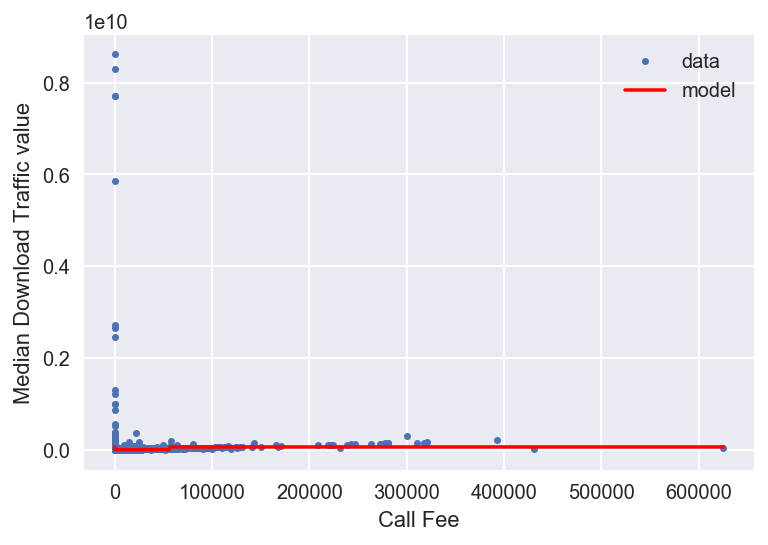

In [156]:
from sklearn import tree
from IPython import display
#from graphviz import Source

model = tree.DecisionTreeRegressor(max_depth=2)
model.fit(CDR_df['CALL_FEE'].to_frame(), y)

plt.plot(CDR_df['CALL_FEE'], y , '.', label='data')
plt.plot(CDR_df['CALL_FEE'].sort_values(), 
         model.predict(CDR_df['CALL_FEE'].sort_values().to_frame()), 
         'r-', label='model')

plt.xlabel('Call Fee')
plt.ylabel('Median Download Traffic value')
plt.legend()

#graph = Source(tree.export_graphviz(model, out_file=None, Colums=['CALL_FEE']))
#display.SVG(graph.pipe(format='svg'))

By allowing for more branching, we can make our model more complex. Does this make our model better or worse?

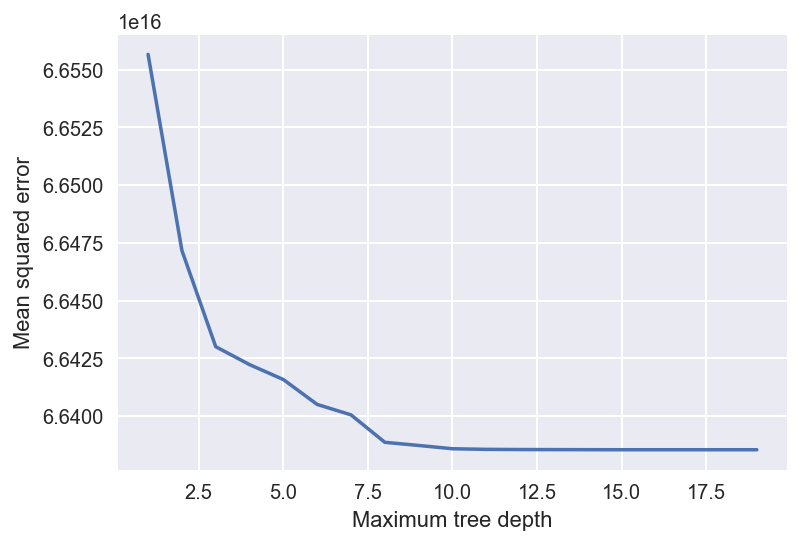

In [159]:
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model = tree.DecisionTreeRegressor(max_depth=max_depth)
    model.fit(CDR_df['CALL_FEE'].to_frame(), y)
    training_error.append(mse(y, model.predict(CDR_df['CALL_FEE'].to_frame())))

plt.plot(max_depths, training_error)
plt.xlabel('Maximum tree depth')
plt.ylabel('Mean squared error');

We reach a conflict: the model looks qualitatively worse beyond max_depth > 5 but the error keeps dropping. This problem is called overfitting. The model looks worse because it doesn't follow the trend of the data, but instead follows the random noise. To detect overfitting, we need to see how our model generalizes to new data. We can do this artificially by withholding part of our data set during the training step, and then using it to test the model.

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_test, y_train, y_test = train_test_split(*shuffle(CDR_df['CALL_FEE'].to_frame(), 
                                                             y), test_size=0.1)

print(X_train.shape)
print(X_test.shape)

(4350, 1)
(484, 1)


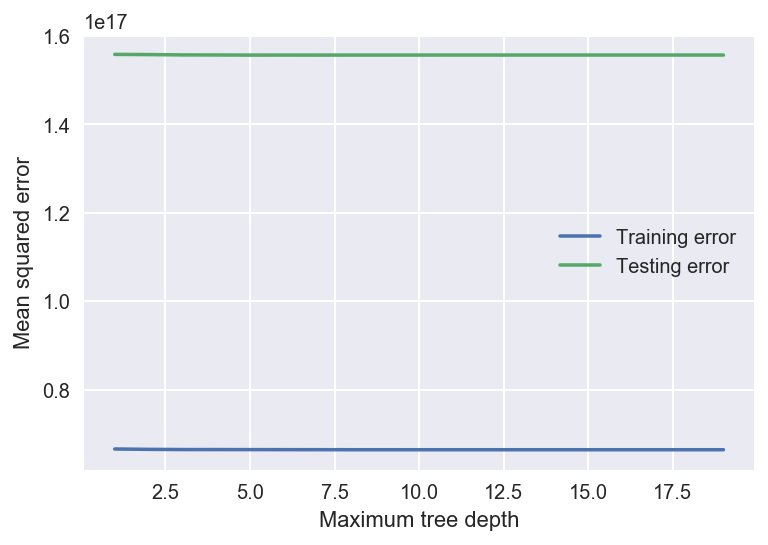

In [162]:
testing_error = []
for max_depth in max_depths:
    model = tree.DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    testing_error.append(mse(y_test, model.predict(X_test)))

plt.plot(max_depths, training_error, label='Training error')
plt.plot(max_depths, testing_error, label='Testing error')
plt.xlabel('Maximum tree depth')
plt.ylabel('Mean squared error')
plt.legend();

In [ ]:
## Next task would be temporal nalysis of traffics 
#let's have simple varible which holds every day incremental values of duration and network traffic
#data_per_day=df.groupby('STATUS_DATE')['TOTAL_DOWNLOAD_TRAFFIC','TOTAL_CALL_DURATION','TOTAL_CALL_FEE','CALL_FEE_MEAN','DOWNLOAD_TRAFFIC_MEDIAN'].max()
#data_per_day